# Working with audio data

Audio is continous by nature. Machines needs finite arrays. 
Meaning that one needs to discretize the audio data to work with it.

Common formats for this is `.wav` (Waveform Audio File), `flac` (Free Lossless Audio Condec), `mp3` etc.


## Sampling and sampling rate

```Sampeling rate tells you how often samples are taken```.

Sampling is the process of converting a continuous signal into a discrete signal by taking samples at regular intervals. The sampling rate is the number of samples taken per second, typically measured in Hertz (Hz). For example, a common sampling rate for audio is 44.1 kHz, which means 44,100 samples are taken every second. Due to the Nyquist theorem, the sampling rate must be at least twice the highest frequency present in the audio signal to avoid aliasing.

When working with machine learning it is important that all the data in the dataset has the same sampling rate. Also models trained on a certain sampling rate will not generalize well to data with a different sampling rate.



## Amplitude and bit depth

Amplitude is the "loudness" of the audio. It describes the sound pressure level of the audio signal. In digital audio, amplitude is represented by a finite number of bits, known as bit depth. Common bit depths include 16-bit and 24-bit. A higher bit depth allows for a greater dynamic range and more precise representation of the audio signal.

Aka bit depth determines how accurately the audio signal can be represented.

For noises for human hearing, a bit depth of 16 bits is sufficient as the rounding errors are not perceivable. 


In [12]:
%pip install librosa matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


## Audio as a Waveform
The waveform is a visual representation of the audio signal, showing how the amplitude of the sound wave changes over time. It is typically displayed as a graph with `time` on the x-axis and `amplitude` on the y-axis.

In [13]:
import librosa
array, sampling_rate = librosa.load(librosa.ex("trumpet"))

## Play the audio


In [ ]:
import IPython.display as ipd
ipd.display(ipd.Audio(array, rate=sampling_rate))

Text(101.09722222222221, 0.5, 'Amplitude')

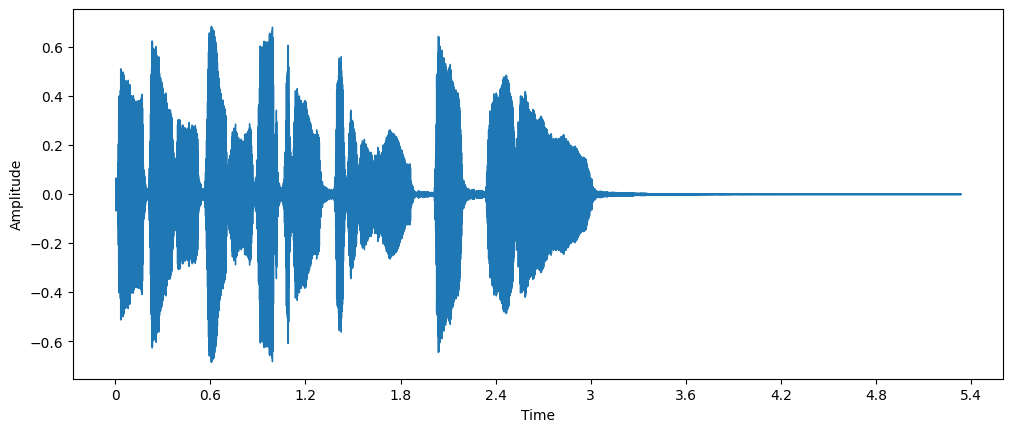

In [15]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)
plt.ylabel("Amplitude")

The waveform can be very useful to see how the audio signal has been affected by preprocessing like, normalization resampling and or filtering. By looking at the before and after one can se if the preprocessing has had the desired effect.

## The frequency spectrum
The spectrum is computed using the discrete Fourier transform (DFT). It describes the individual frequencies that make up the signal and how strong they are.

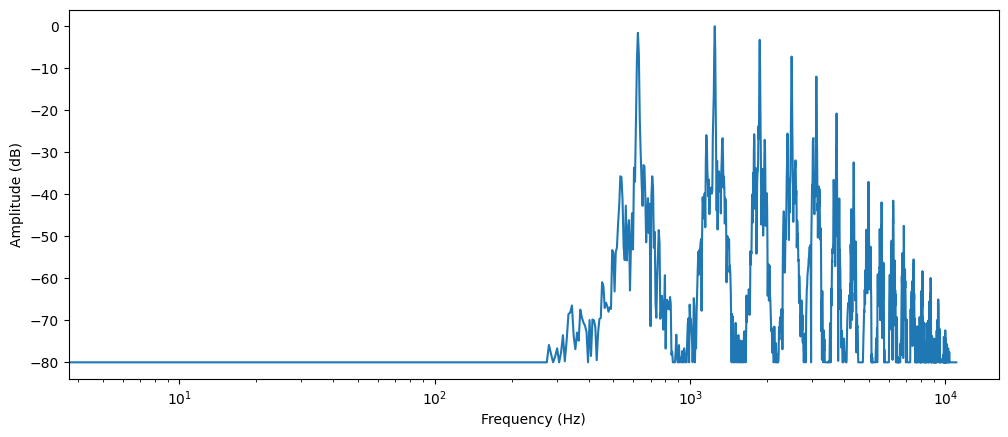

In [16]:
import numpy as np

sample_slice = 4096
dft_input = array[:sample_slice]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

## Spectrogram
A spectrogram plots the frequency content of an audio signal as it changes over time. It allows you to see time, frequency, and amplitude all on one graph. The algorithm that performs this computation is the STFT or Short Time Fourier Transform.

The spectrogram is one of the most informative audio tools available to you. For example, when working with a music recording, you can see the various instruments and vocal tracks and how they contribute to the overall sound. In speech, you can identify different vowel sounds as each vowel is characterized by particular frequencies.

Text(0.5, 1.0, 'Spectrogram')

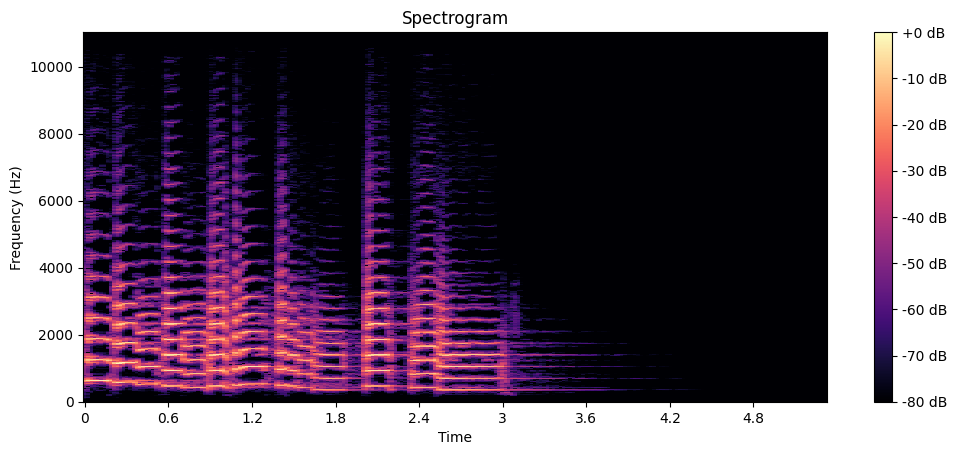

In [17]:
import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar(format="%+2.f dB")
plt.ylabel("Frequency (Hz)")
# Color bar label
plt.title("Spectrogram")

In this plot, the x-axis represents time as in the waveform visualization but now the y-axis represents frequency in Hz. The intensity of the color gives the amplitude or power of the frequency component at each point in time, measured in decibels (dB).

## Mel spectrogram
The Mel spectrogram is a variation that is commonly used in speech processing and machine learning tasks. It applies a Mel scale to the frequency axis, which is more aligned with human perception of sound. The Mel scale compresses higher frequencies and expands lower frequencies, making it more suitable for tasks like speech recognition.

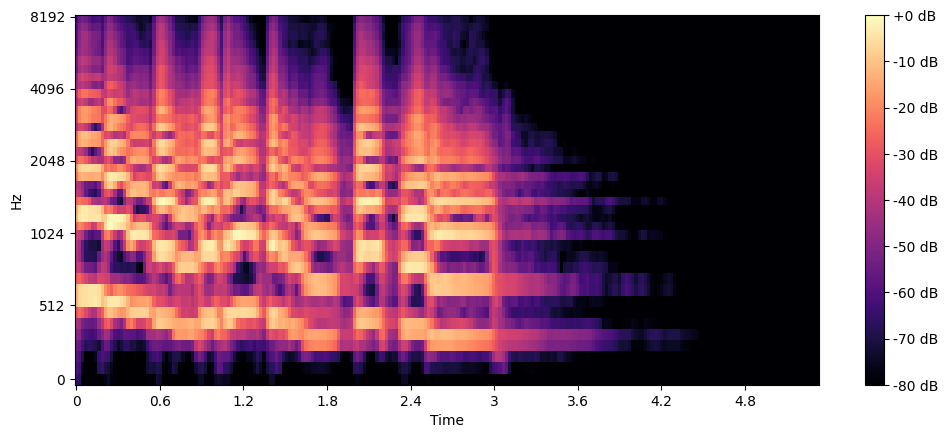

In [29]:
# The mel bands define a set of frequency ranges that divide the spectrum into perceptually meaningful components, 
# using a set of filters whose shape and spacing are chosen to mimic the way the human ear responds to different frequencies. 
# Common values for n_mels are 40 or 80.
highest_frequency_of_interest = 8000

S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=40, fmax=highest_frequency_of_interest)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=highest_frequency_of_interest)
plt.colorbar(format="%+2.f dB")